# Planewaves in Homogeneous Media

The eigenmode source can also be used to launch [planewaves](https://en.wikipedia.org/wiki/Plane_wave) in homogeneous media. The dispersion relation for a planewave is ω=|$\vec{k}$|/$n$ where ω is the angular frequency of the planewave and $\vec{k}$ its wavevector; $n$ is the refractive index of the homogeneous medium. This example demonstrates launching planewaves in a uniform medium with $n$ of 1.5 at three rotation angles: 0°, 20°, and 40°. Bloch-periodic boundaries via the `k_point` are used and specified by the wavevector $\vec{k}$. PML boundaries are used only along the x-direction.

First, we'll load our necesarry modules:

In [4]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

Next, we'll create a function we can call multiple times that runs the simulation for different rotation angles:

In [5]:
def run_sim(rot_angle=0):

    resolution = 50  # pixels/μm

    cell_size = mp.Vector3(14, 10, 0)

    pml_layers = [mp.PML(thickness=2, direction=mp.X)]

    fsrc = 1.0/1.55  # frequency of planewave (wavelength = 1/fsrc)

    n = 1.5  # refractive index of homogeneous material
    default_material = mp.Medium(index=n)

    k_point = mp.Vector3(fsrc * n).rotate(mp.Vector3(z=1), rot_angle)

    sources = [
        mp.EigenModeSource(
            src=mp.ContinuousSource(fsrc),
            center=mp.Vector3(),
            size=mp.Vector3(y=10),
            direction=mp.AUTOMATIC if rot_angle == 0 else mp.NO_DIRECTION,
            eig_kpoint=k_point,
            eig_band=1,
            eig_parity=mp.EVEN_Y + mp.ODD_Z if rot_angle == 0 else mp.ODD_Z,
            eig_match_freq=True,
        )
    ]

    sim = mp.Simulation(
        cell_size=cell_size,
        resolution=resolution,
        boundary_layers=pml_layers,
        sources=sources,
        k_point=k_point,
        default_material=default_material,
        symmetries=[mp.Mirror(mp.Y)] if rot_angle == 0 else [],
    )

    sim.run(until=100)

    plt.figure(dpi=100)
    sim.plot2D(fields=mp.Ez)
    plt.show()

Next we'll iterate over three rotation angles and plot their steady-state fields profiles. Residues of the backward-propagating waves due to the discretization are slightly visible.

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00184798 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.163087 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0.967742,0,0) = 0.645161 after 43 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 39.410000000000004/100.0 = 39.4% done in 4.0s, 6.2s to go
on time step 3942 (time=39.42), 0.00101485 s/step
Meep progress: 79.03/100.0 = 79.0% done in 8.0s, 2.1s to go
on time step 7907 (time=79.07), 0.00100904 s/step
run 0 finished at t = 100.0 (10000 timesteps)


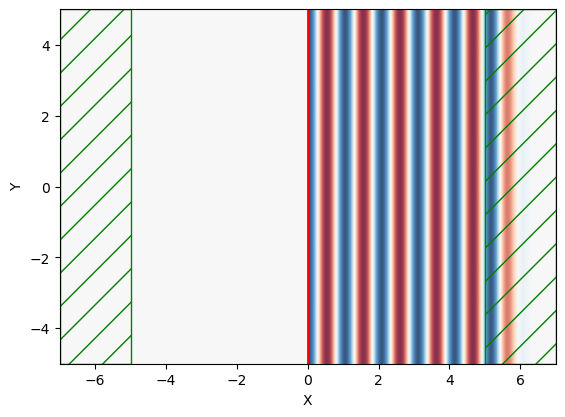

-----------
Initializing structure...
time for choose_chunkdivision = 6.29425e-05 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.317389 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0.90938,0.330987,0) = 0.645161 after 50 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 19.080000000000002/100.0 = 19.1% done in 4.0s, 17.0s to go
on time step 1908 (time=19.08), 0.00209648 s/step
Meep progress: 37.42/100.0 = 37.4% done in 8.0s, 13.4s to go
on time step 3742 (time=37.42), 0.00218132 s/step
Meep progress: 55.88/100.0 = 55.9% done in 12.0s, 9.5s to go
on time step 5589 (time=55.89), 0.00216671 s/step
Meep progress: 75.02/100.0 = 75.0% done in 16.0s, 5.3s to go
on time step 7503 (time=75.03), 0.00209023 s/step
Meep progress: 94.01/100.0 = 94.0% done in 20.0s, 1.3s to go
on time step 9403 (time=94.03), 0.0021062 s/step
run 0 finished at t = 100.0 (10000 timesteps)


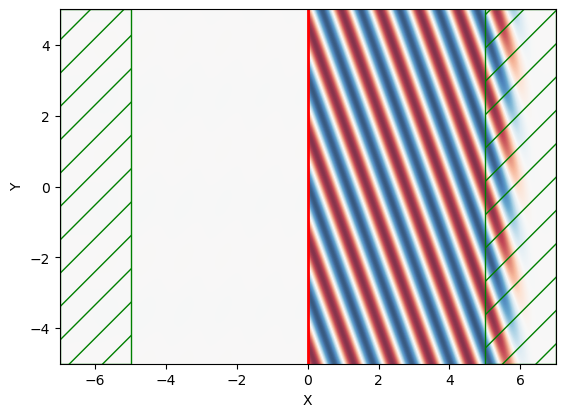

-----------
Initializing structure...
time for choose_chunkdivision = 6.69956e-05 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.319913 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0.741333,0.622053,0) = 0.645161 after 42 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 18.35/100.0 = 18.4% done in 4.0s, 17.8s to go
on time step 1836 (time=18.36), 0.00217966 s/step
Meep progress: 37.0/100.0 = 37.0% done in 8.0s, 13.6s to go
on time step 3701 (time=37.01), 0.00214502 s/step
Meep progress: 55.54/100.0 = 55.5% done in 12.0s, 9.6s to go
on time step 5556 (time=55.56), 0.00215656 s/step
Meep progress: 74.79/100.0 = 74.8% done in 16.0s, 5.4s to go
on time step 7481 (time=74.81), 0.00207811 s/step
Meep progress: 93.16/100.0 = 93.2% done in 20.0s, 1.5s to go
on time step 9318 (time=93.18), 0.00217781 s/step
run 0 finished at t = 100.0 (10000 timesteps)


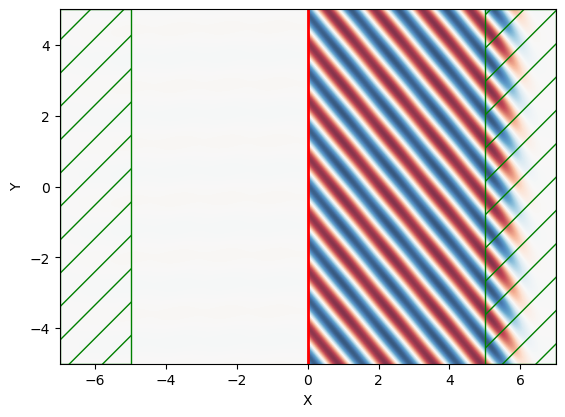

In [6]:
for rot_angle in np.radians([0, 20, 40]):
    run_sim(rot_angle)

Note that this example involves a `ContinuousSource` for the time profile. For a pulsed source, the oblique planewave is incident at a given angle for only a *single* frequency component of the source. This is a fundamental feature of FDTD simulations and not of Meep per se. Thus, to simulate an incident planewave at multiple angles for a given frequency ω, you will need to do separate simulations involving different values of $\vec{k}$ (`k_point`) since each set of ($\vec{k}$,ω) specifying the Bloch-periodic boundaries and the frequency of the source will produce a different angle of the planewave. For more details, refer to Section 4.5 ("Efficient Frequency-Angle Coverage") in [Chapter 4](https://arxiv.org/abs/1301.5366) ("Electromagnetic Wave Source Conditions") of [Advances in FDTD Computational Electrodynamics: Photonics and Nanotechnology](https://www.amazon.com/Advances-FDTD-Computational-Electrodynamics-Nanotechnology/dp/1608071707).